<a href="https://colab.research.google.com/github/lukehartfield/DiamondPricePrediction/blob/main/Diamond_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset from Kaggle

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/diamonds-prices")

print("Path to dataset files:", path)
csv_file_path = os.path.join(path, "Diamonds Prices2022.csv")
df = pd.read_csv(csv_file_path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()



Path to dataset files: /kaggle/input/diamonds-prices


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 Question:How does quality and physical factors influence diamond price, and can we accurately predict its price using these features?


In [ ]:
df[df[['x', 'y', 'z']].eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
df.isna().sum() #nonavalues


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:

df = df.rename(columns={'x': 'length(mm)', 'y': 'width(mm)', 'z': 'depth(mm)'})

df.head()


,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


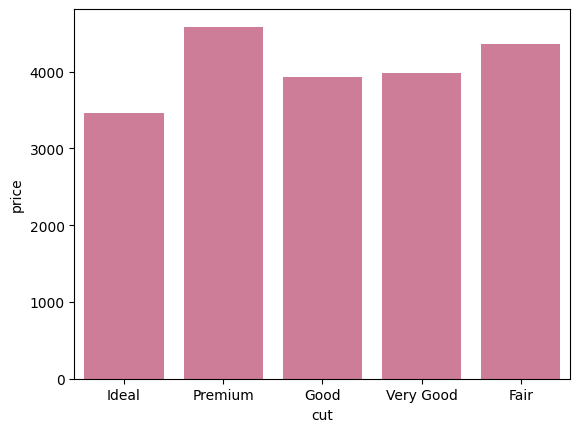

In [ ]:
sns.barplot(x='cut', y='price',color='palevioletred', data=df,errorbar=None,)
plt.show()



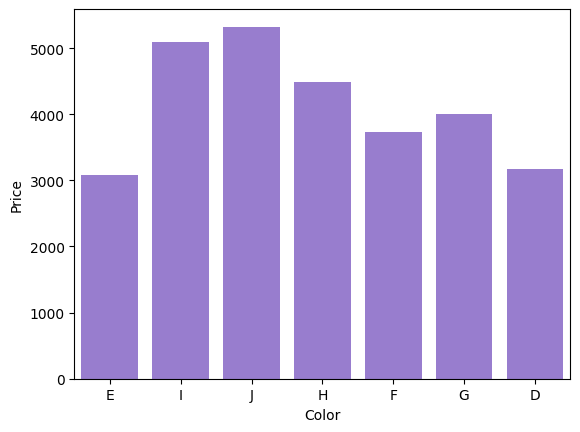

In [ ]:
sns.barplot(x='color', y='price',color='mediumpurple', data=df,errorbar=None,)
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

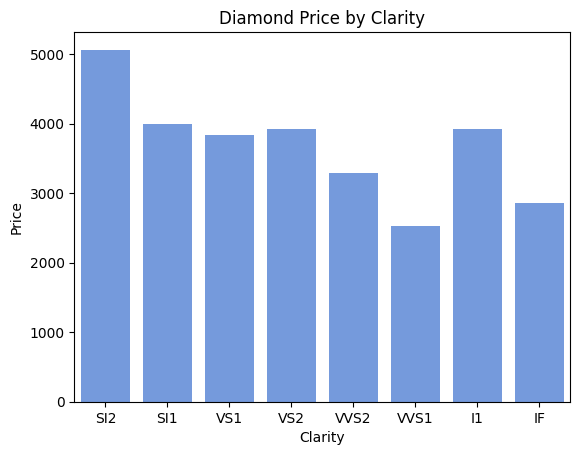

In [ ]:
sns.barplot(x='clarity', y='price',color='cornflowerblue', data=df,errorbar=None,)
plt.title('Diamond Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

In [ ]:
# import seaborn as sns
# sns.heatmap(X.corr(), annot=True)

In [ ]:
# Adding a volume column
#df.drop(columns=['Unnamed: 0'], inplace=True)
df['volume'] = df['length(mm)'] * df['width(mm)'] * df['depth(mm)']
df.head()


,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm),volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
df['price'].mean()

np.float64(3932.734293606214)

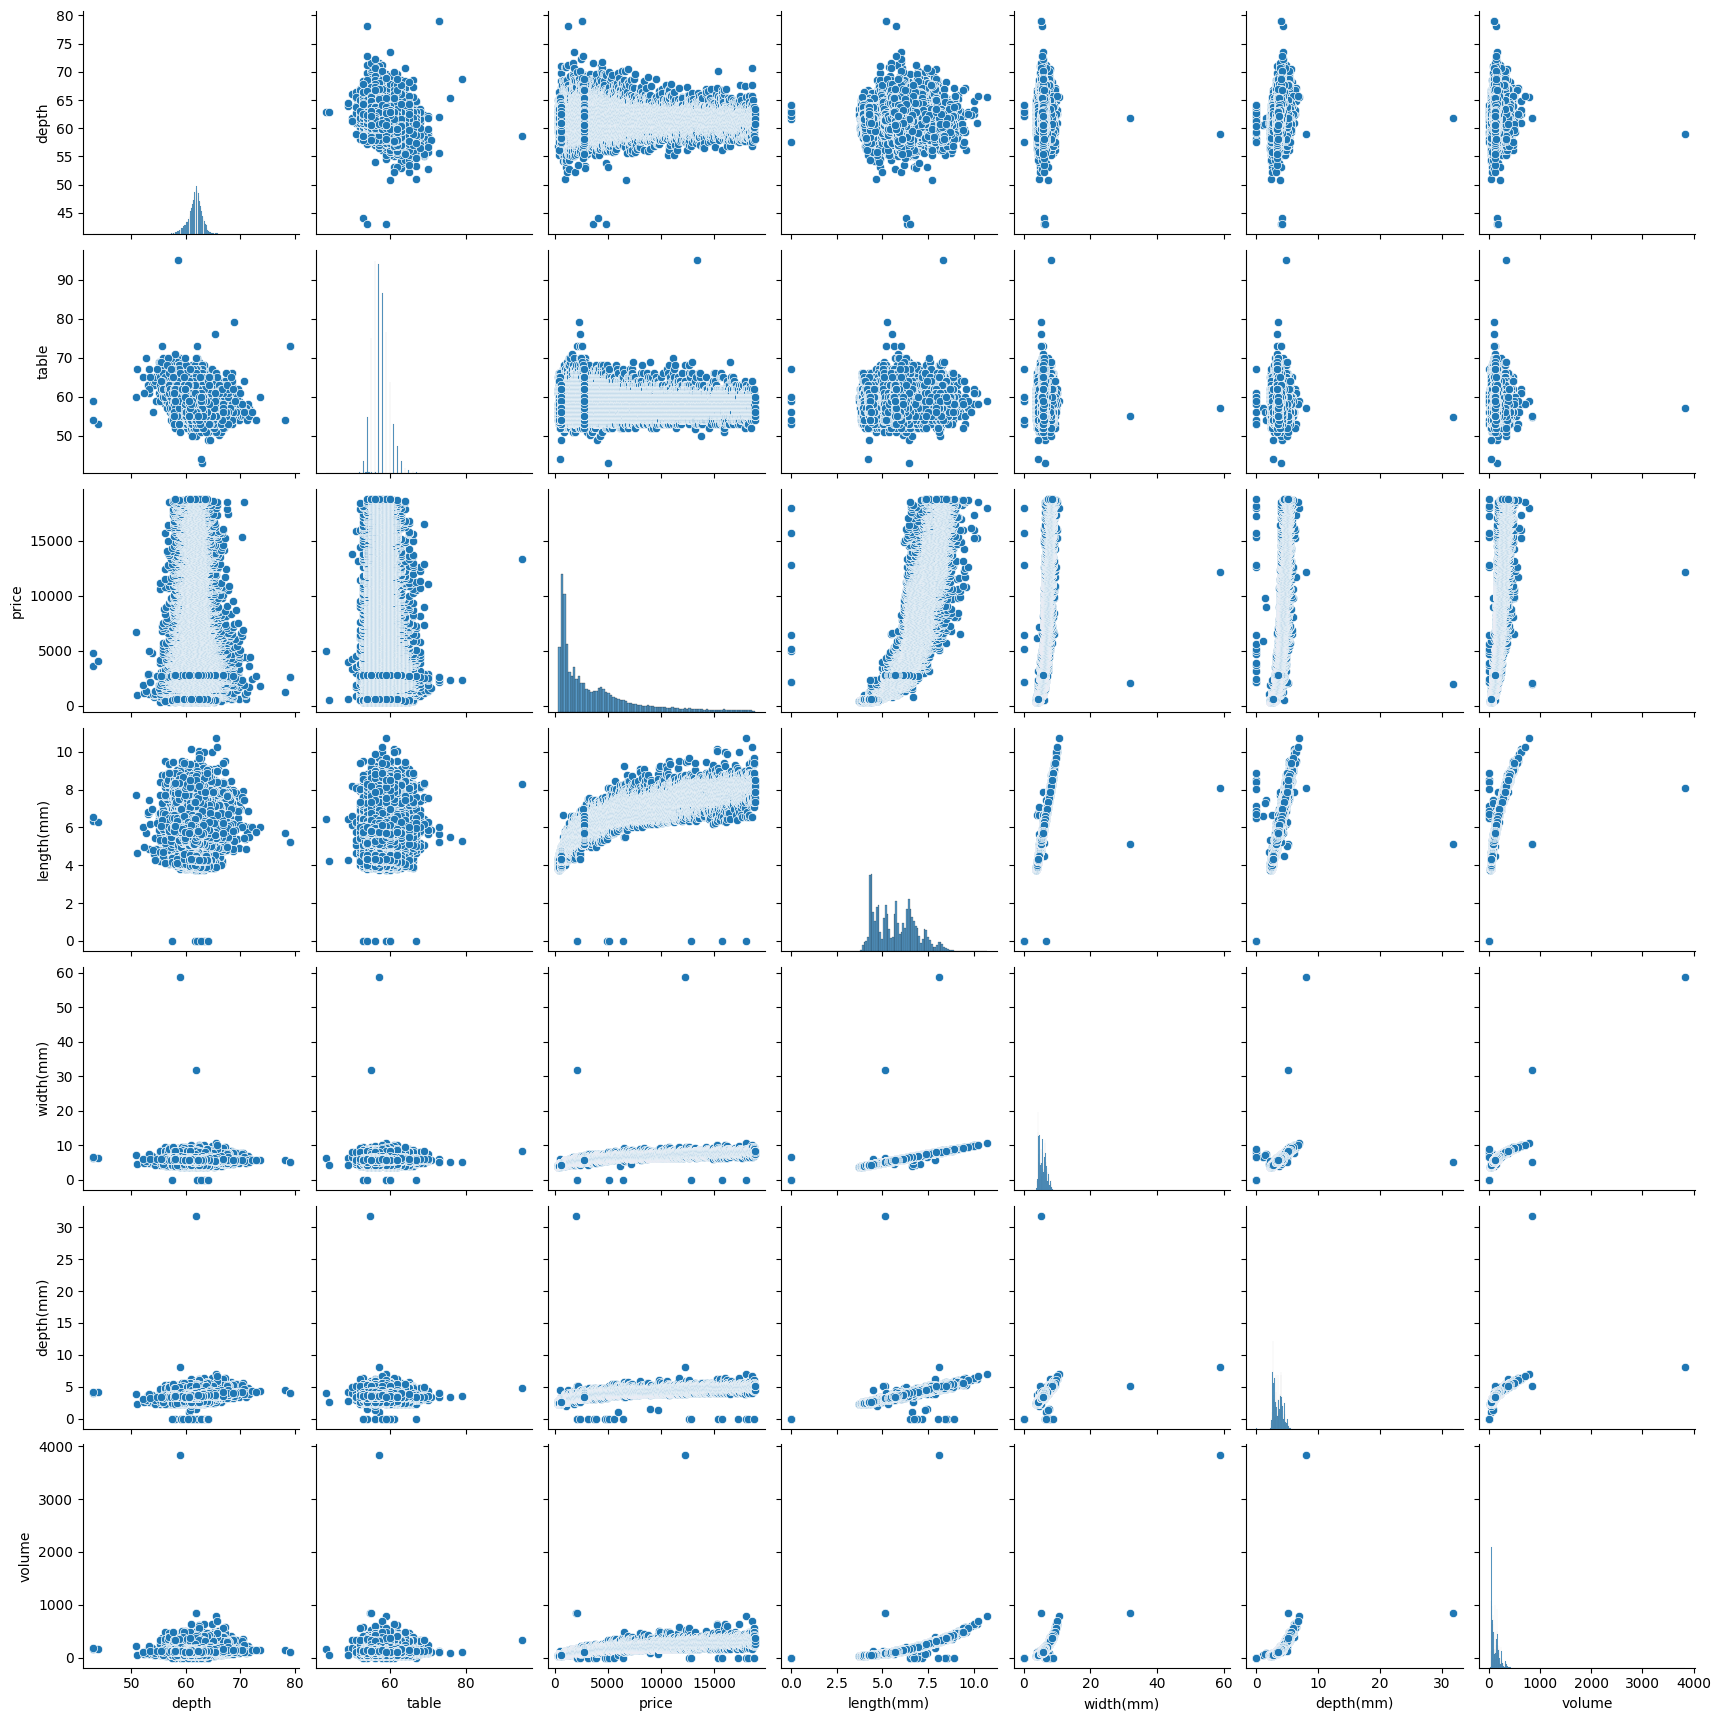

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
df
sns.pairplot(df.iloc[:,3:])
plt.show()


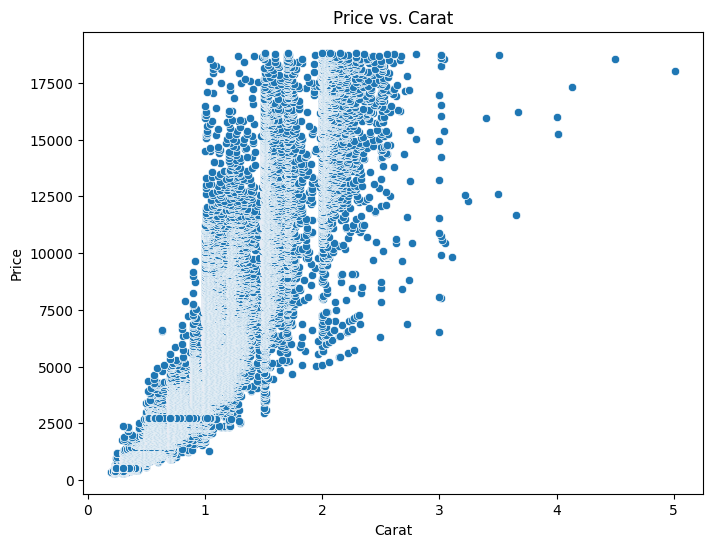

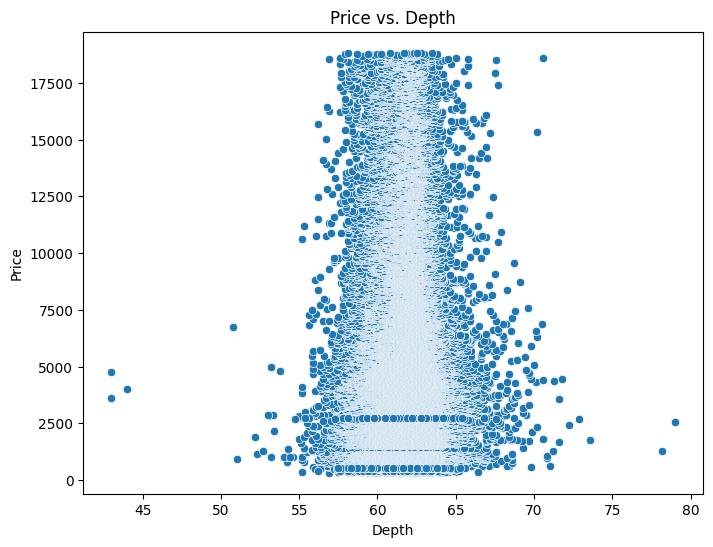

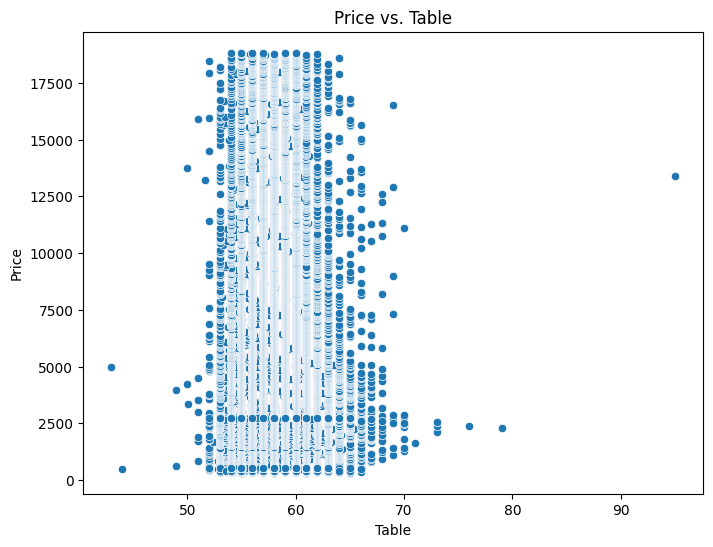

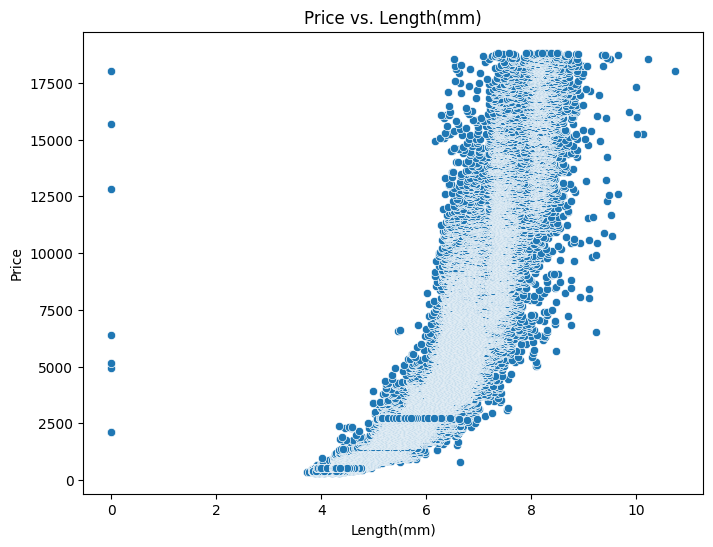

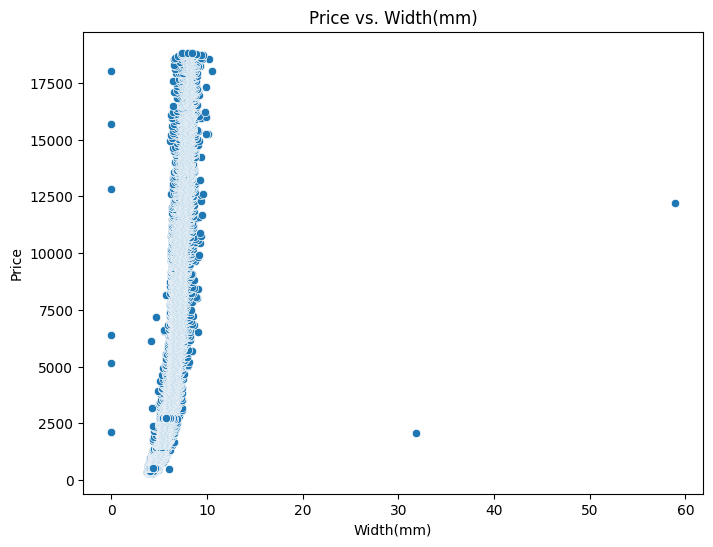

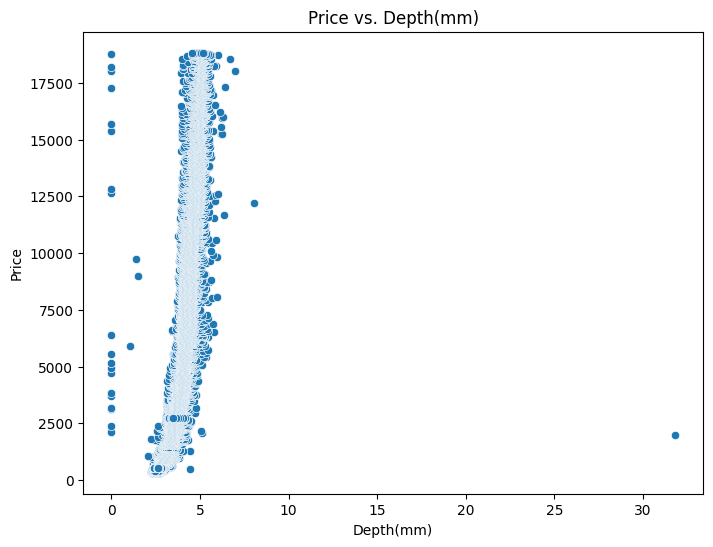

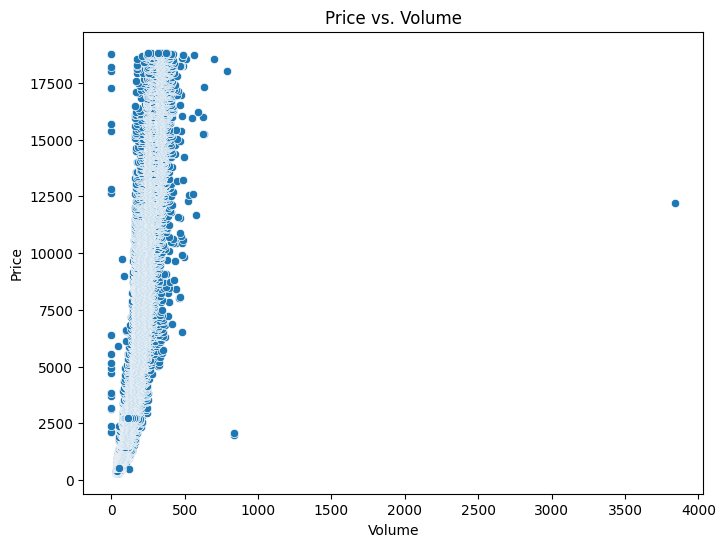

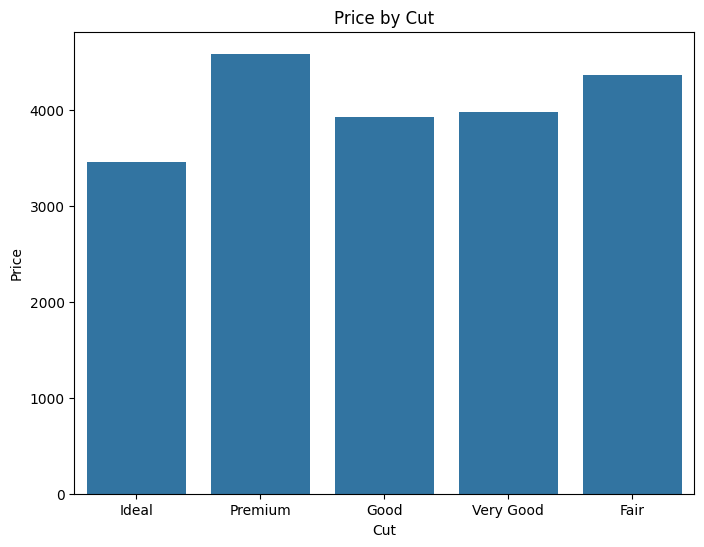

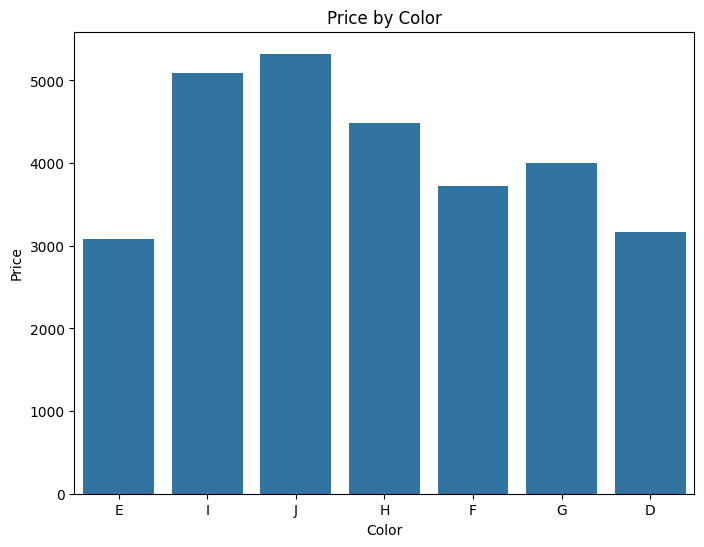

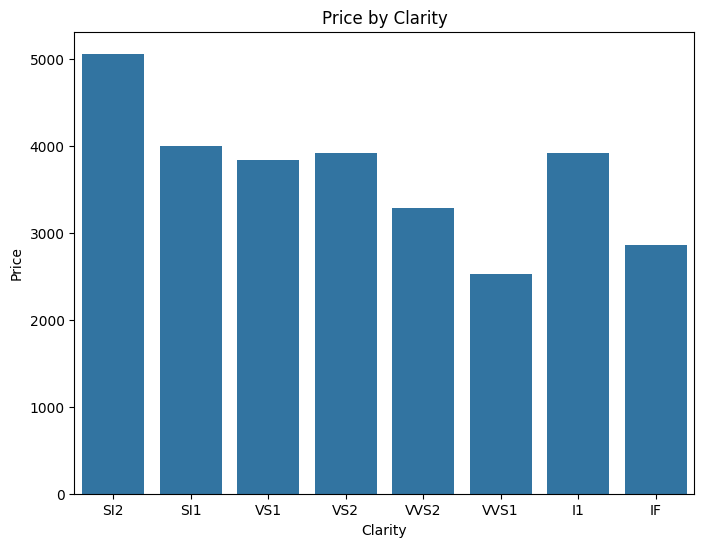

In [ ]:
# Scatter plots for numerical features vs. price
numerical_features = ['carat', 'depth', 'table', 'length(mm)', 'width(mm)', 'depth(mm)', 'volume']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Price vs. {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.show()

# Bar plots for categorical features vs. price (using original categorical values for better readability)
df_categorical = pd.read_csv(csv_file_path)
df_categorical.drop(columns=['Unnamed: 0'], inplace=True)
df_categorical = df_categorical.rename(columns={'x': 'length(mm)', 'y': 'width(mm)', 'z': 'depth(mm)'})


categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='price', data=df_categorical, errorbar=None)
    plt.title(f'Price by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.show()

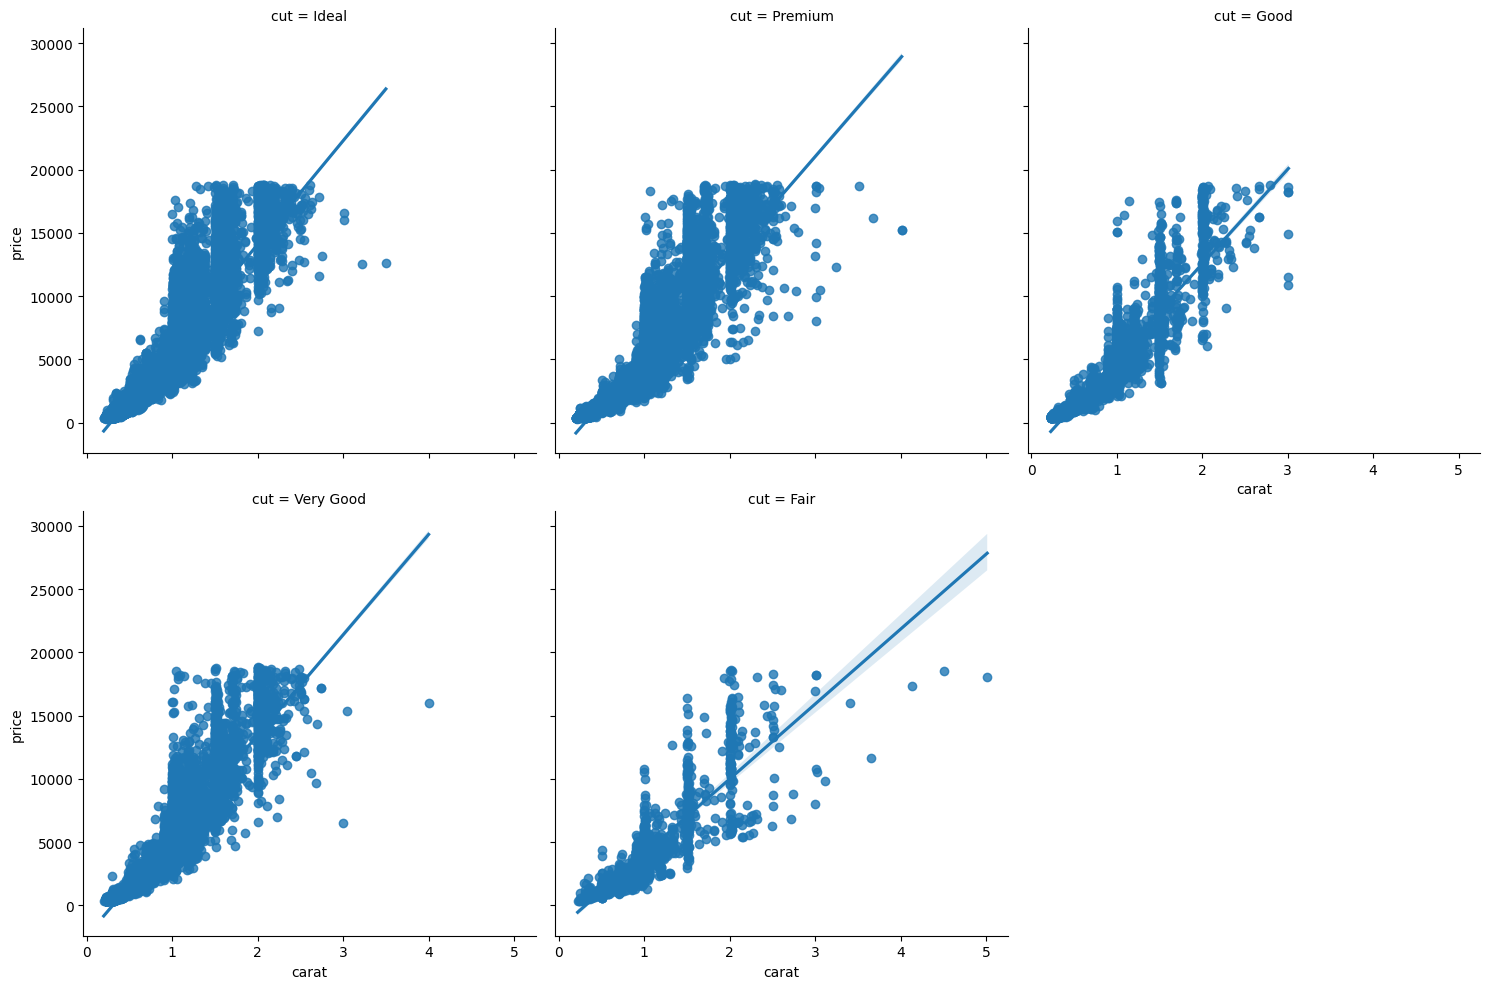

In [ ]:
sns.lmplot(x='carat', y='price',col='cut',col_wrap=3,data=df,fit_reg=True)
plt.show()

In [ ]:
# Taking unique values from 'cut'
df['cut'].unique()
#ranking cut
df['cut'] = df['cut'].str.strip()
map_cut = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
df['cut'] = df['cut'].map(map_cut)
df['color'] = df['color'].str.strip()
map_color = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
df['color'] = df['color'].map(map_color)



In [ ]:
df['clarity'] = df['clarity'].str.strip()
map_clarity = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(map_clarity)
df.head()


,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm),volume
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


Creating price as the target variable (y)

In [ ]:
y = df['price']

In [ ]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
X = df[features]

y = df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


carat      0.921591
volume     0.902385
table      0.127118
depth     -0.010630
cut       -0.053487
clarity   -0.146791
color     -0.172520
Name: price, dtype: float64


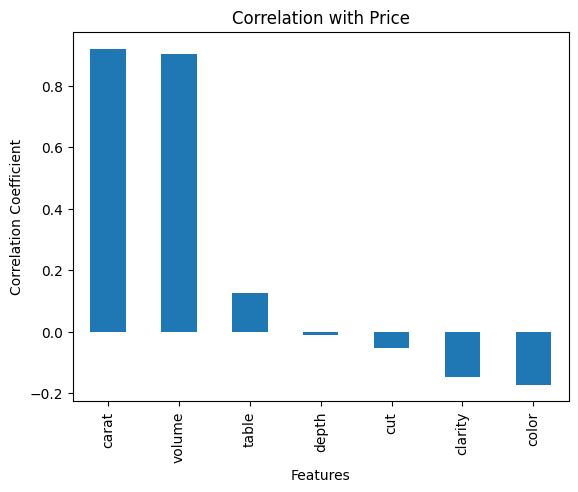

In [ ]:
# Running an apriori correlation test

corr = df[['price','carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']].corr()

correlation_with_price = corr['price'].sort_values(ascending = False)[1:]

print(correlation_with_price)
correlation_with_price.plot(kind='bar', title='Correlation with Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

Selecting Variables to use as predictors and splitting into training and testing set.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
logreg = LinearRegression()
results = logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
logistic_mse = mean_squared_error(y_test, y_pred_log)
logistic_r2 = r2_score(y_test, y_pred_log)
print("Mean Squared Error:", logistic_mse)
print("R-squared:", logistic_r2)
logistic_rmse = np.sqrt(logistic_mse)
print("RMSE:", logistic_rmse)
coefficients = logreg.coef_
print(coefficients)

results.values

y_pred_log.mean()

Mean Squared Error: 1451708.3649481807
R-squared: 0.9070200875757503
RMSE: 1204.8686089977532
[4108.85841251  132.4085704   544.1676004   861.26305372  -61.47302556
  -56.67174015   67.62571549]


AttributeError: 'LinearRegression' object has no attribute 'values'

In [ ]:
# Fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

# Coefficients
print("Model Coefficients:", model.coef_)

# Mean of predicted values
print("Mean of predicted values:", y_pred.mean())

Mean Squared Error: 1451708.3649481807
R-squared: 0.9070200875757503
Root Mean Squared Error: 1204.8686089977532
Model Coefficients: [4108.85841251  132.4085704   544.1676004   861.26305372  -61.47302556
  -56.67174015   67.62571549]
Mean of predicted values: 3883.464312205275


In [ ]:
import numpy as np
import scipy.stats as stats

# Add a constant term for the intercept
X_train_with_intercept = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))

# Predictions and residuals
y_pred_train = model.predict(X_train_scaled)
residuals = y_train - y_pred_train

# Degrees of freedom
n = X_train_scaled.shape[0]  # number of samples
p = X_train_scaled.shape[1] + 1  # number of predictors (+1 for intercept)

# Estimate of variance of the error term
residual_variance = np.sum(residuals ** 2) / (n - p)

# Covariance matrix of the beta estimates
XTX_inv = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept)
standard_errors = np.sqrt(np.diagonal(residual_variance * XTX_inv))

# t-statistics for coefficients
coefficients = np.insert(model.coef_, 0, model.intercept_)
t_stats = coefficients / standard_errors

# Two-sided p-values
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n - p))

# Print p-values
print("P-values for coefficients:")
for i, p_val in enumerate(p_values):
    label = "Intercept" if i == 0 else f"Coef {i}"
    print(f"{label}: {p_val:.6f}")


P-values for coefficients:
Intercept: 0.000000
Coef 1: 0.000000
Coef 2: 0.000000
Coef 3: 0.000000
Coef 4: 0.000000
Coef 5: 0.000000
Coef 6: 0.000000
Coef 7: 0.008813


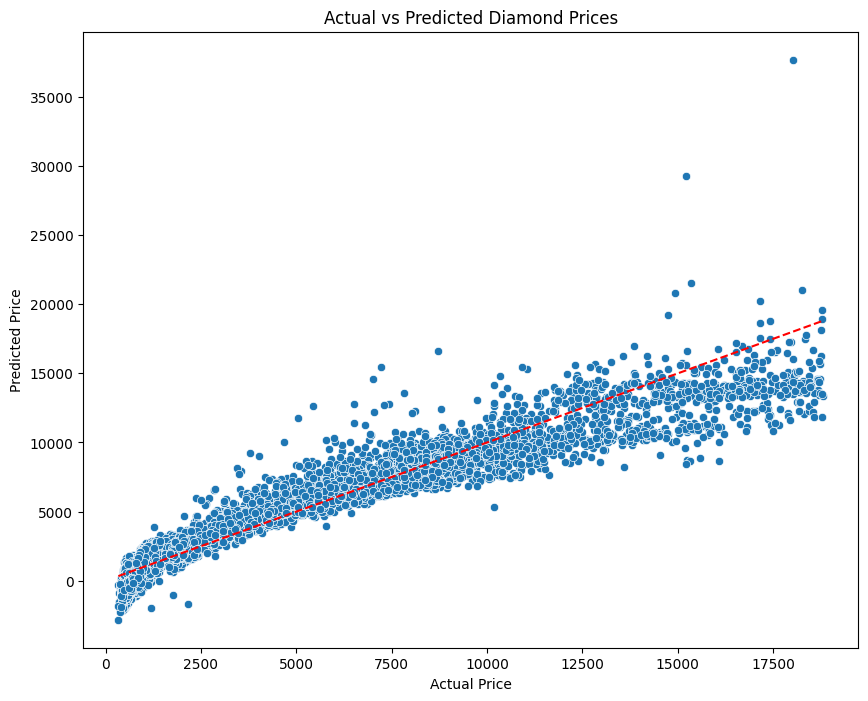

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_log)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.show()

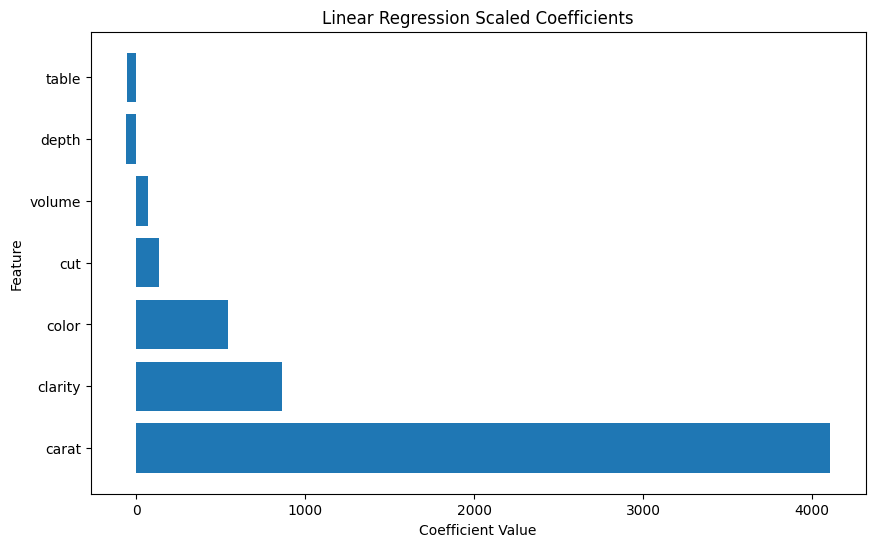

In [ ]:
# graph sorted coefficients from logistic regression
import matplotlib.pyplot as plt
import numpy as np
coefficients = logreg.coef_
feature_names = features
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Scaled Coefficients')
plt.show()



In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Mean Squared Error:", dt_mse)
print("R-squared:", dt_r2)
dt_rmse = np.sqrt(dt_mse)
print("RMSE:", dt_rmse)


Mean Squared Error: 519176.46584484197
R-squared: 0.9667474656118634
RMSE: 720.5390106335964


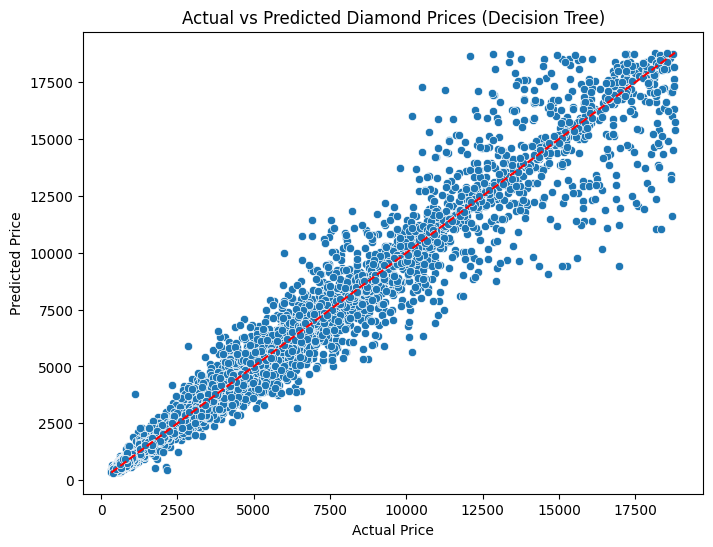

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (Decision Tree)")
plt.show()


In [ ]:
# prune the tree
dt_model_pruned = DecisionTreeRegressor(max_depth=3)
dt_model_pruned.fit(X_train, y_train)
y_pred_dt_pruned = dt_model_pruned.predict(X_test)
dt_model_pruned_mse = mean_squared_error(y_test, y_pred_dt_pruned)
dt_model_pruned_r2 = r2_score(y_test, y_pred_dt_pruned)
print("Mean Squared Error:", dt_model_pruned_mse)
print("R-squared:", dt_model_pruned_r2)
dt_model_pruned_rmse = np.sqrt(dt_model_pruned_mse)
print("RMSE:", dt_model_pruned_rmse)


Mean Squared Error: 1777274.7673964833
R-squared: 0.8861680099003546
RMSE: 1333.1446910956377


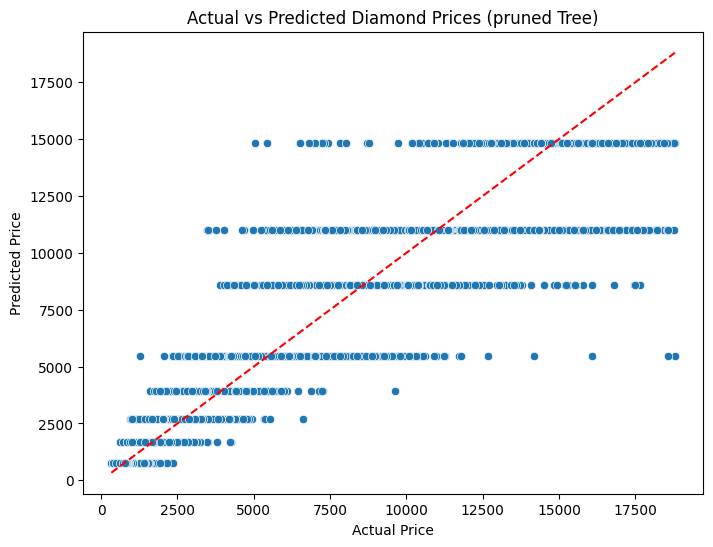

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt_pruned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (pruned Tree)")
plt.show()


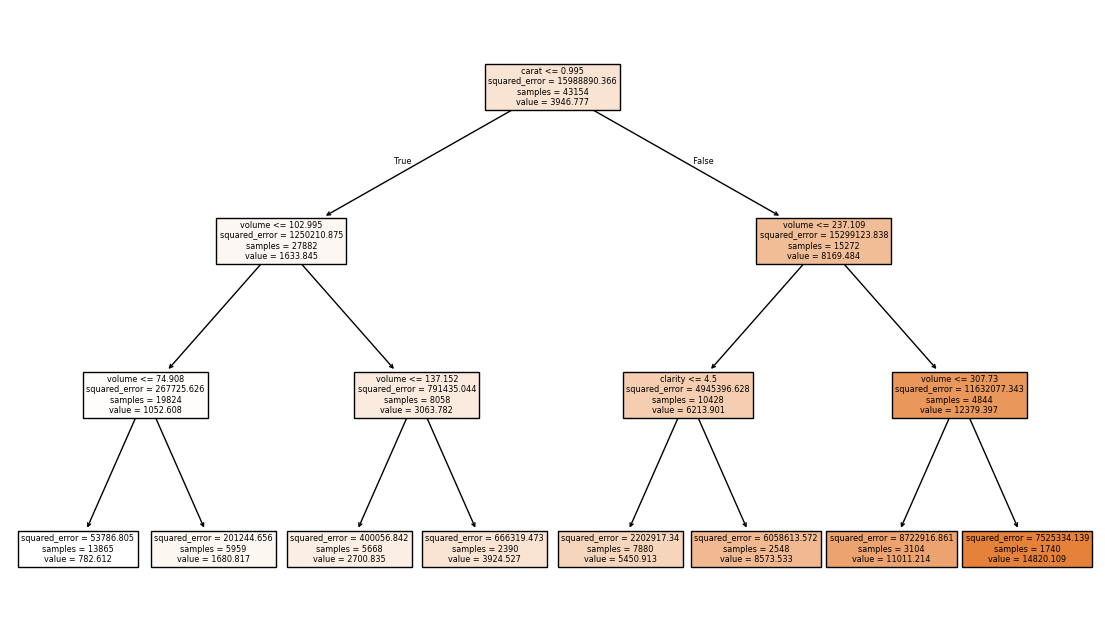

In [ ]:
#plot pruned tree
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 8))
plot_tree(dt_model_pruned, filled=True,feature_names=X_train.columns)
plt.show()



Value= predicted price of diamond.

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("RMSE:", rf_rmse)


Mean Squared Error: 287637.99965326465
R-squared: 0.9815771840519761
RMSE: 536.3189346398882


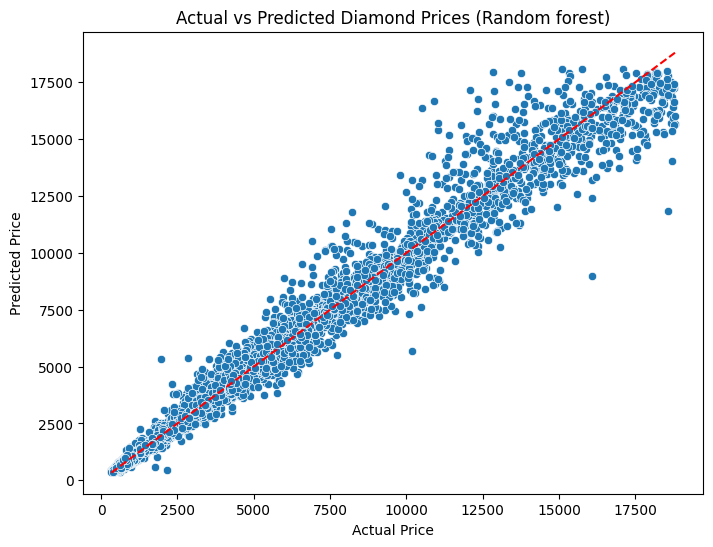

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (Random forest)")
plt.show()


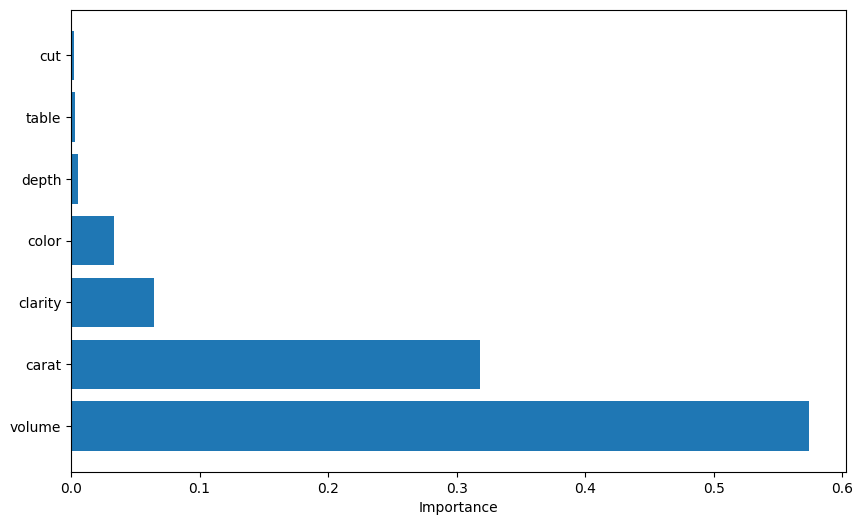

In [ ]:
# Create features importances plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
feature_names_sorted = [feature_names[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names_sorted)), importances[indices], align='center')
plt.yticks(range(len(feature_names_sorted)), feature_names_sorted)
plt.xlabel('Importance')
plt.show()


In [ ]:
# Xg boost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgboost = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgboost)
xgb_r2 = r2_score(y_test, y_pred_xgboost)
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)
xgb_rmse = np.sqrt(xgb_mse)
print("RMSE:", xgb_rmse)


Mean Squared Error: 294681.8125
R-squared: 0.9811260104179382
RMSE: 542.8460301964085


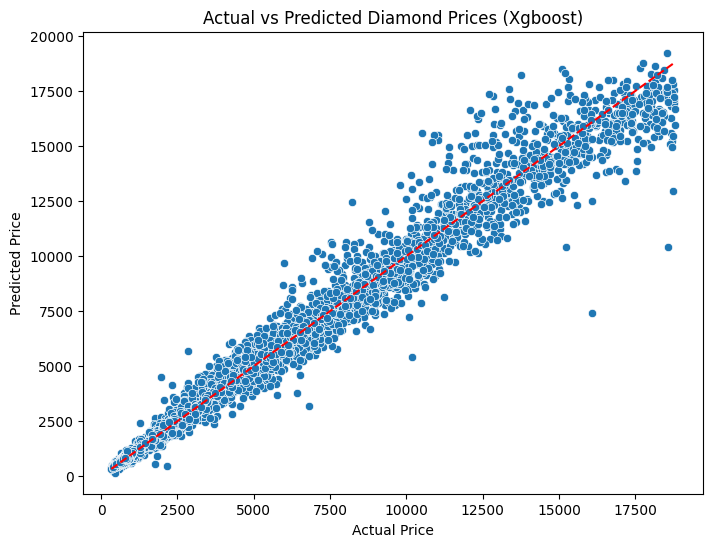

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgboost)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices (Xgboost)")
plt.show()


57% accuracy with xg boost model. Harder to predict if screentime actually affects mental health.

In [ ]:
# create baseline model using majority class
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
base_rmse = np.sqrt(mse)
print('RMSE:', base_rmse)


Mean Squared Error: 15618069.344619824
R-squared: -0.000315734868997275
RMSE: 3951.970311707797


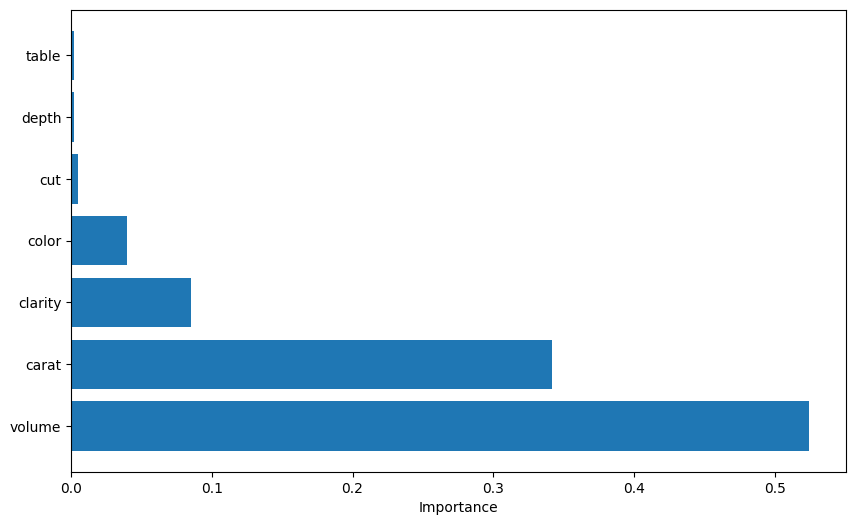

In [ ]:
# Create features importances plot
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
feature_names_sorted = [feature_names[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names_sorted)), importances[indices], align='center')
plt.yticks(range(len(feature_names_sorted)), feature_names_sorted)
plt.xlabel('Importance')
plt.show()


In [ ]:
model_names = ['logreg', 'dt_model', 'dt_model_pruned', 'rf_model', 'xgb_model']
mse_values = [logistic_mse, dt_mse, dt_model_pruned_mse, rf_mse, xgb_mse]
rmse_values = [logistic_rmse, dt_rmse, dt_model_pruned_rmse, rf_rmse, xgb_rmse]
r2_values = [logistic_r2, dt_r2, dt_model_pruned_r2, rf_r2, xgb_r2]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'R-squared': r2_values,
    'RMSE': rmse_values
})

print(comparison_df)

             Model           MSE  R-squared         RMSE
0           logreg  1.451708e+06   0.907020  1204.868609
1         dt_model  5.191765e+05   0.966747   720.539011
2  dt_model_pruned  1.777275e+06   0.886168  1333.144691
3         rf_model  2.876380e+05   0.981577   536.318935
4        xgb_model  2.946818e+05   0.981126   542.846030


/tmp/ipython-input-3742293634.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


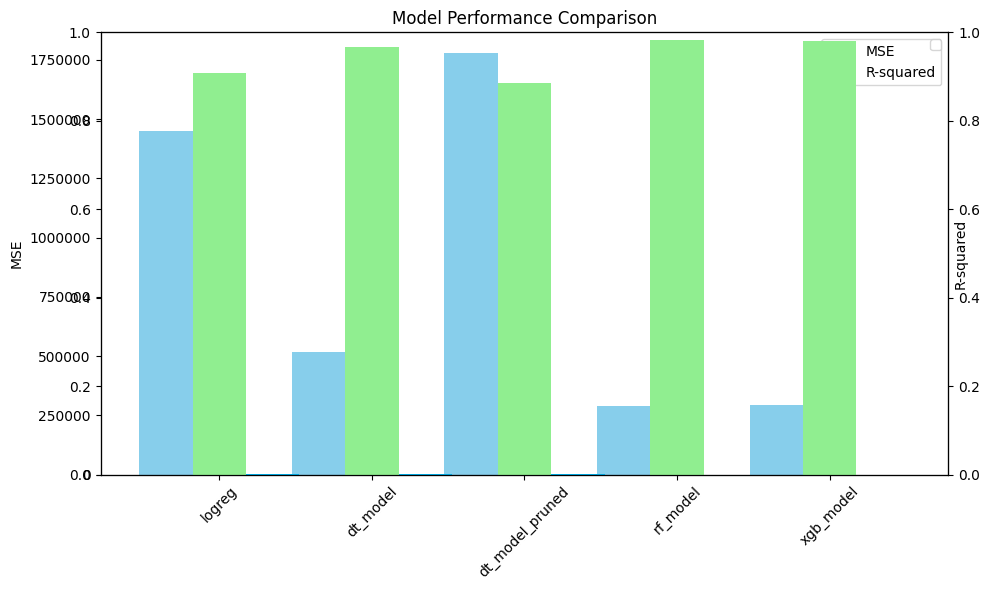

In [ ]:
x = np.arange(len(model_names))
width = 0.35

## Not working cause of units in RMSE, will fix it in a minute
fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width, mse_values, width, label='MSE', color='skyblue')
ax1.set_ylabel('MSE')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)
ax1.ticklabel_format(style='plain', axis='y')  # disable scientific notation on y-axis

ax2 = ax1.twinx()
bars2 = ax2.bar(x, r2_values, width, label='R-squared', color='lightgreen')
ax2.set_ylabel('R-squared')
ax2.set_ylim(0, 1)

ax3 = ax2.twinx()
bars3 = ax1.bar(x + width, rmse_values, width, label='RMSE', color='deepskyblue')
ax2.set_ylabel('R-squared')
ax2.set_ylim(0, 1)

handles = [bars1[0], bars2[0]]
labels = ['MSE', 'R-squared']
ax1.legend(handles, labels, loc='best')

plt.title('Model Performance Comparison')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
